# Первая часть. Исследование

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [6]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [9]:
import io
data = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
data.shape

(5282, 20)

In [11]:
data.head(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [8]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [12]:
data[cat_cols] = data[cat_cols].astype('category')
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

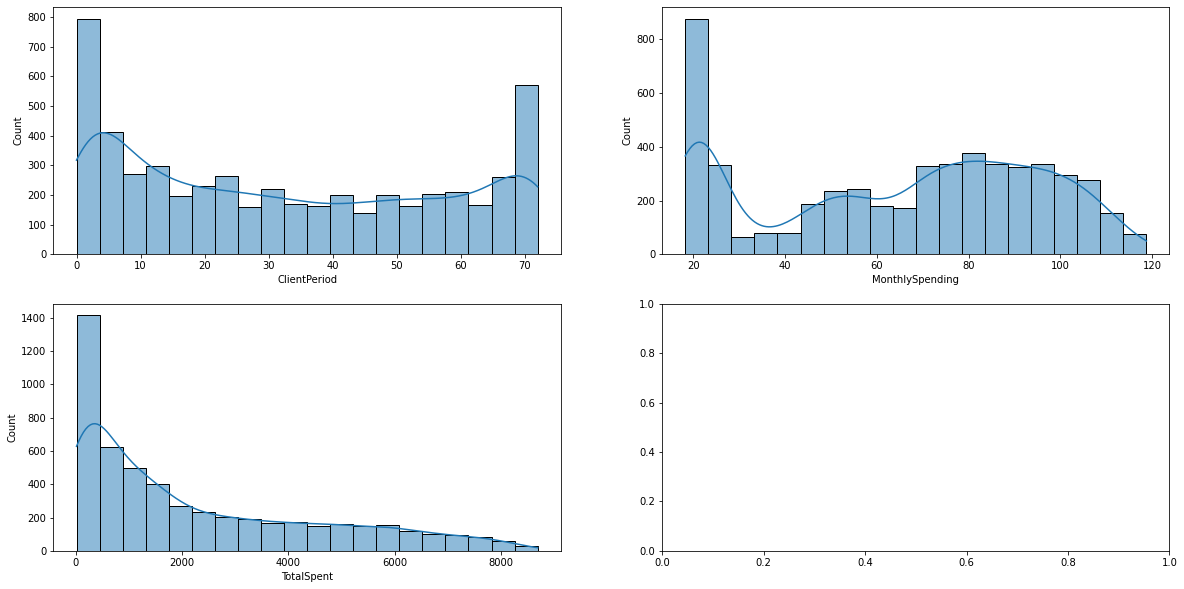

In [17]:
import seaborn as sns
n_num_cols = len(num_cols)
col_wrap = 2
fig, ax = plt.subplots((n_num_cols + col_wrap - 1) // col_wrap, col_wrap, figsize=(20, 10))
for ax, col in zip(ax.flatten(), num_cols):
    sns.histplot(data=data, x=col, bins=20, kde=True, ax=ax)

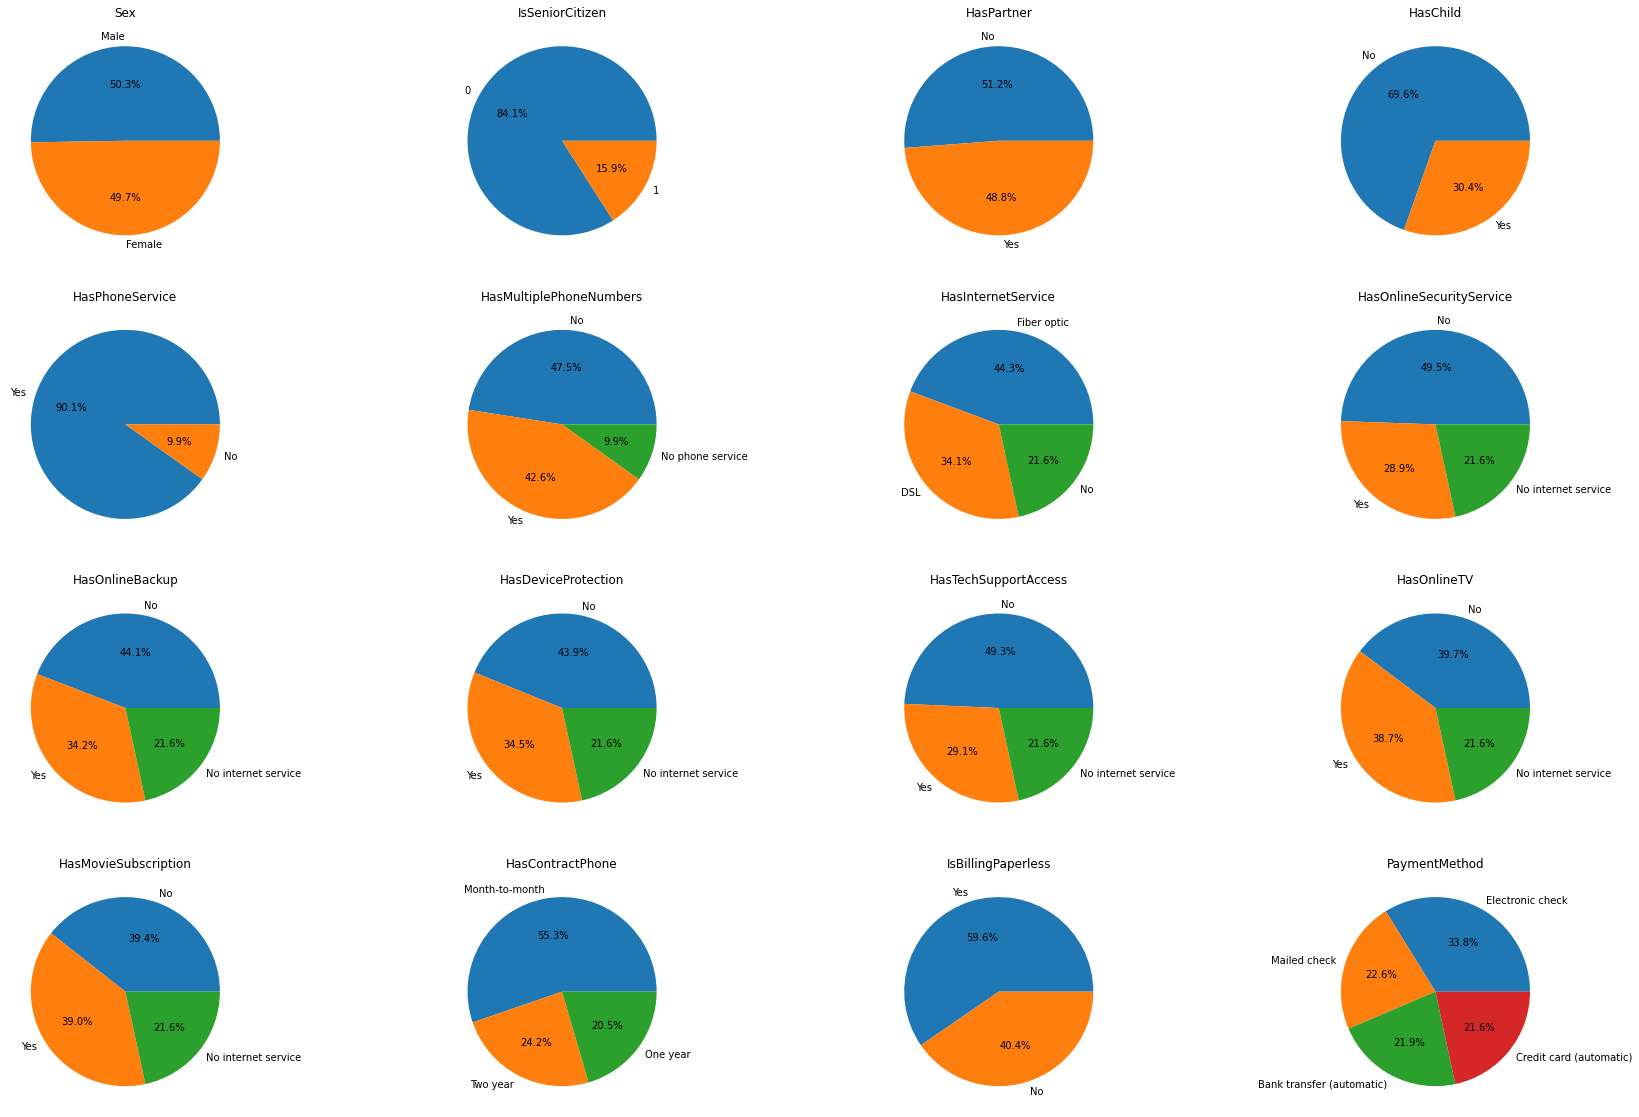

In [18]:
n_cat_cols = len(cat_cols)
col_wrap = 4
fig, axs = plt.subplots((n_cat_cols + col_wrap - 1) // col_wrap, col_wrap, figsize=[30, 20])
for ax, col in zip(axs.flatten(), cat_cols):
    labels, x = zip(*data[col].value_counts().items())
    ax.pie(x, labels=labels, autopct='%1.1f%%')
    ax.set_title(col)

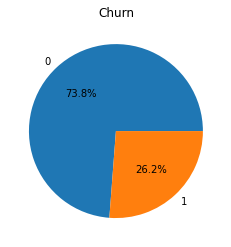

In [19]:
labels, x = zip(*data[target_col].value_counts().items())
plt.pie(x, labels=labels, autopct='%1.1f%%');
plt.gca().set_title(target_col);

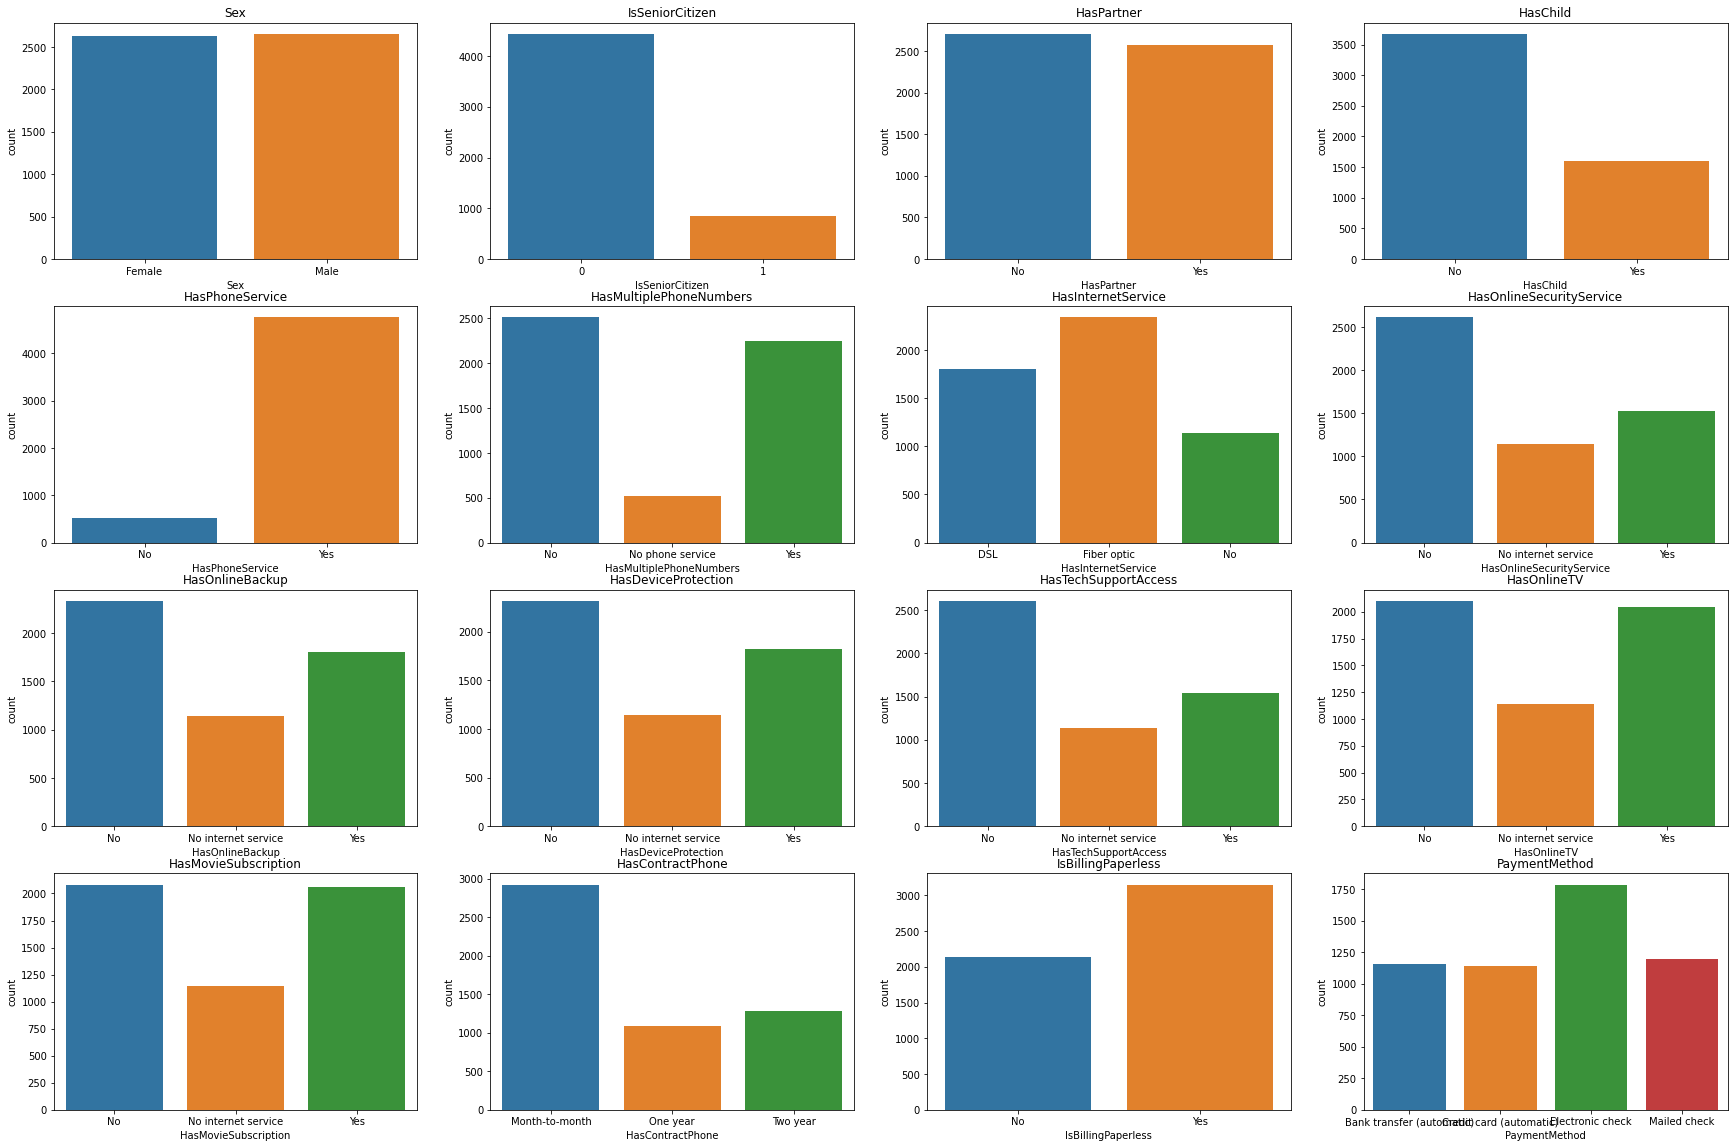

In [25]:
fig, axs = plt.subplots(4, 4, figsize=[30, 20])
for ax, col in zip(axs.flatten(), cat_cols):
    labels, x = zip(*data[col].value_counts().items())
    # ax.pie(x, labels=labels, autopct='%1.1f%%')
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(col)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [35]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

In [27]:
from itertools import zip_longest
from sklearn.compose import ColumnTransformer

class Transformer():
    def __init__(self, num_cols, cat_cols):
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, data):
        num_cols = list(set(self.num_cols).intersection(set(data.columns)))
        cat_cols = list(set(self.cat_cols).intersection(set(data.columns)))
        data = data.copy(deep=True)
        data = data.reset_index()
        
        for col in num_cols:
            data[col] = pd.to_numeric(data[col], errors='coerce')
            data.loc[data[col].isna(), col] = data[col].mean()
        data[num_cols] = StandardScaler().fit_transform(data[num_cols])
        
        for col in cat_cols:
            data[col] = data[col].astype('category')
        cat_df = pd.DataFrame(OneHotEncoder().fit_transform(data[cat_cols]).toarray())
        data = data.drop(columns=cat_cols)
        data = data.join(cat_df)
        return data

transformer = Transformer(num_cols, cat_cols)

clf = LogisticRegression(max_iter=1000)
clf = Pipeline(steps=[('transformer', transformer), ('estimator', clf)])

In [29]:
class CV_splitter():
    def __init__(self, n_splits=5):
        self.n_splits = n_splits
        self.test_size = 1 / n_splits
    
    def split(self, X, *args):
        n_samples = X.shape[0]        
        rng = np.random.default_rng()
        perm = rng.permutation(np.arange(n_samples))
        perm = np.arange(n_samples)
        
        remainder = n_samples % self.n_splits
        div = n_samples // self.n_splits
        n_test_samples = []
        for _ in np.arange(self.n_splits):
            n_test_samples.append(div + remainder // self.n_splits)
            remainder %= self.n_splits
            remainder += n_samples % self.n_splits
        
        print(np.array(n_test_samples).cumsum())
        idxs = np.cumsum(n_test_samples)
        print(idxs)
        for l, r in zip([None] + idxs[:-1].tolist(), idxs):            
            print(l, r)
            mask = np.zeros(n_samples, dtype='bool')
            mask[l : r] = True
            yield perm[~mask], perm[mask]
            
    def get_n_splits(self, *args):
        return self.n_splits

splitter = CV_splitter()

In [31]:
X_all = data.drop(columns=target_col)
y_all = data[target_col]
from sklearn.model_selection import KFold
cv = KFold()
for split in cv.split(X_all):
    print(split)

(array([1057, 1058, 1059, ..., 5279, 5280, 5281]), array([   0,    1,    2, ..., 1054, 1055, 1056]))
(array([   0,    1,    2, ..., 5279, 5280, 5281]), array([1057, 1058, 1059, ..., 2111, 2112, 2113]))
(array([   0,    1,    2, ..., 5279, 5280, 5281]), array([2114, 2115, 2116, ..., 3167, 3168, 3169]))
(array([   0,    1,    2, ..., 5279, 5280, 5281]), array([3170, 3171, 3172, ..., 4223, 4224, 4225]))
(array([   0,    1,    2, ..., 4223, 4224, 4225]), array([4226, 4227, 4228, ..., 5279, 5280, 5281]))


In [33]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
print(X_all.shape)
cv = KFold()
print(cv.get_n_splits(X_all))
cv = CV_splitter()
res = cross_validate(clf, X_all, y_all, scoring='roc_auc', cv=cv)
res['test_score'].mean()

(5282, 19)
5
[1056 2112 3169 4225 5282]
[1056 2112 3169 4225 5282]
None 1056
1056 2112
2112 3169
3169 4225
4225 5282


0.8405896336732257

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.1)
param_grid = {
    'estimator__C' : np.logspace(3, 2, 6)
}
gs = GridSearchCV(clf, param_grid=param_grid, scoring='roc_auc', cv=splitter)
res = gs.fit(X_all, y_all)
best_estimator = res.best_estimator_

[1056 2112 3169 4225 5282]
[1056 2112 3169 4225 5282]
None 1056
1056 2112
2112 3169
3169 4225
4225 5282


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [42]:
df = pd.DataFrame(res.cv_results_)
df = df.sort_values(by='rank_test_score')
df = df.filter(regex=('param_.*|mean_test_score|rank_test_score'))
df.columns = df.columns.str.replace('param_estimator__', '')
df

,C,mean_test_score,rank_test_score
5,100,0.843298,1
3,251.189,0.842950,2
0,1000,0.842634,3
2,398.107,0.842487,4
4,158.489,0.842200,5
1,630.957,0.842002,6


In [43]:
y_pred = res.best_estimator_.predict_proba(X_val)
roc_auc_score(y_val, y_pred[:, 1])

0.8502019831068675

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [50]:
!pip install catboost

     |████████████████████████████████| 67.3MB 63kB/s 


In [53]:
from catboost import CatBoostClassifier
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

iterations = np.arange(300, 1000, 100, dtype='int')
lrs = [None, 0.01, 0.008, 0.009, 0.011, 0.012]
df = pd.DataFrame()
for iterations in iterations:
    for lr in lrs:
        model = CatBoostClassifier(random_state=42, eval_metric='AUC')
        params = {'iterations': iterations, 'learning_rate': lr}
        model.set_params(**params)
        model.fit(X_train, y_train, cat_cols, silent=True)
        y_pred = model.predict_proba(X_val)
        sc = roc_auc_score(y_val, y_pred[:, 1])
        params = model.get_all_params()
        res = {'iterations': params['iterations'], 'learning_rate': params['learning_rate'], 'roc_auc': sc}        
        df = df.append(res, ignore_index=True)

df = df.sort_values(by='roc_auc', ascending=False)
df.head()

,iterations,learning_rate,roc_auc
38,900.0,0.008,0.830337
32,800.0,0.008,0.830337
26,700.0,0.008,0.830231
33,800.0,0.009,0.830164
39,900.0,0.009,0.830155


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [55]:
best_params = df.iloc[0, :]
print(best_params)
catboost_model = CatBoostClassifier(random_state=42, eval_metric='AUC')
catboost_model.set_params(**best_params.drop(index='roc_auc'))
catboost_model.fit(X_all, y_all, cat_features=cat_cols, silent=True)

iterations       900.000000
learning_rate      0.008000
roc_auc            0.830337
Name: 38, dtype: float64


# Предсказания

In [56]:
best_model = catboost_model

In [57]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [58]:
import io
X_test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

In [60]:
from google.colab import files
uploaded = files.upload()

Saving submission.csv to submission.csv


In [61]:
import io
submission = pd.read_csv(io.StringIO(uploaded['submission.csv'].decode('utf-8')))

In [62]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)
submission['Churn']

0       0.029976
1       0.668922
2       0.617064
3       0.015681
4       0.007062
          ...   
1756    0.142913
1757    0.013705
1758    0.799079
1759    0.479613
1760    0.014691
Name: Churn, Length: 1761, dtype: float64